# Apprentissage supervisé - Multiple Regression Linéaire

Nous avons vu précédemment la régression linéaire simple, via les modèles `LinearRegression` et `HuberRegression`, toutefois si nos tests ont très bien fonctionné, il est rare que nos régressions soient simples dans le monde réel, les problèmes sont plus complexes et donc impliquent plus de variables (features).

Etant donné que nous sommes toujours dans le cas d'une régression nos données doivent toujours être **numériques quantitatives**.

![Image regression](../_images/regression.jpg)
Notre but est toujours de trouver la courbe passant par le plus de points, mais cette fois-ci avec plusieurs features (entrées).

### But du TP
- Découvrir la régression linéaire multiple
- Tester différents modèles de régression linéaire
- Découvrir d'autres façon d'afficher les données avec un nouveau type de graphique

## Regression Linéaire Multiple

Beaucoup plus utilisée donc, la régression linéaire multiple consiste à trouver la droite répondant à l'équation suivante :
$$ y = a_1x_1 + a_2x_2 + … + a_nx_n + b $$
A partir de notre jeu de données qui ressemble à quelque chose comme ceci
![Image regression](../_images/dataframe-linear-multiple.jpg)

Pour les outils, on ne change pas par rapport à la régression linéaire simple, on va donc utiliser :
- numpy
- pandas
- matplotlib.pyplot
- scikit-learn
(voir les précédentes pratiques si vous avez oublié à quoi ils servent)

Quant au dataset, nous allons changer de fichier, mais rester dans le même thème : l'immobilier.

# Avant-propos - Pour les utilisateurs de Google colab

Petit apparté pour les utilisateurs de google colab. Pour utiliser la méthode `pd.read_csv()`, il faudra rajouter quelques lignes de codes supplémentaires pour pouvoir charger un fichier, les voici.

```python
# Première cellule jupyter
from google.colab import files
uploaded = files.upload()
```

```python
# Seconde cellule jupyter
import io
# Très important : le nom du fichier passé en paramètre de la fonction "uploaded" doit avoir le même nom que le fichier que vous avez uploadé
df = pd.read_csv(io.BytesIO(uploaded['nom-du-fichier-uploader.csv']))
```

- [Voir plus  d'informations sur le chargement de fichiers externes avec Google colab](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)

# Phase 1 : Chargement des données

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

logements_df_src = pd.read_csv("datasets/mlr-prix-logements.csv")
# On garde une copie du dataset
logements_df = logements_df_src.copy()

# Phase 2 : Exploration des données

On essaye de se poser des questions pour mieux connaître notre jeu de données :
- Quelle est la structure de notre dataset ? `df.head()` / `df.tail()`
- Est-ce qu'il y a des données manquantes ? `df.isnull().sum()`
- Est-ce que le format de données est correct ? `df.dtypes`
- Quels sont les données statistiques que nous pouvons sortir de notre dataset ? `df.describe()`
- Que cherchons nous à faire ? Qu'est-ce que nous essayons de trouver ?
- Question subsidiaire : Quelles features influences réellement notre résultat de sortie ?  


Note : Un pied carré fait environ 0,092 m²


### A vous de coder

In [2]:
# Quelle est la structure de notre dataset ? 

# Est-ce qu'il y a des données manquantes ?

# Est-ce que le format de données est correct ?

# Quels sont les données statistiques que nous pouvons sortir de notre dataset ? 

# Question subsidiaire : Quelles features influences réellement notre résultat de sortie ? 

## Corréalation et Causalité

Souvent confondues, la corrélation et la causalité sont deux notions différentes, en statistiques confondre les deux peut conduire à des erreurs. La corrélation détermine la relation entre deux variables qui semblent montrer qu'elles évoluent ensemble (négative : l'une monte, l'autre descend / positive : les deux montent ou descendent en même temps). De ceci on peut potentiellement en déduire une causalité. La causalité désigne une corrélation dans laquelle une variable influence sur l'autre.
Par exemple, si je travaille plus, je gagne plus l'argent. Il y a une corrélation entre mon temps de travail et mon salaire, et une causalité car l'augmentation de mon salaire suit mon temps de travail. 

Ainsi, il peut avoir des corrélations sans causalité, le site de Tyler Vigen liste ce genre de cas.
- [Visiter le site de Tyler Vigen (en anglais)](http://tylervigen.com/page?page=1)

Nous allons donc essayer de trouver les potentielles corrélations (avec causalités) de nos différentes colonnes. Ceci ce calcul grâce à la covariance, cette variable (comprise entre -1 et 1 inclus) désigne le degré de corrélation (positif ou négatif) entre deux variables.
- Covariance proche de -1 : Implique une corrélation négative, les deux variables sont inversement proprotionnelles. Si une augmente, l'autre descend. Elles sont liées.
- Covariance proche de 1 : Implique une corrélation positive, les deux variables sont proportionnelles. Si une augmente, l'autre augmente, la même si ça descend. Elles sont liées.
- Covariance proche de 0 : Implique une corrélation "nulle", les deux variables ne s'influence pas. **Elle ne sont pas liées.**

Pour calculer la covariance de nos colonnes, nous allons ~faire les calculs à la main~ utiliser pandas et la méthode de DataFrame `.corr()`.

### A vous de coder

- Affichez la corrélation des colonnes grâce à la méthode `.corr()` sur le DataFrame `logements_df`. N'oubliez pas la fonction `display()` si votre cellule ne termine pas par le calcul de correlations.

In [3]:
logements_df.corr()

,taille_en_pieds_carre,nb_chambres,age_vendeur,prix
taille_en_pieds_carre,1.000000,0.559967,-0.092645,0.854988
nb_chambres,0.559967,1.000000,-0.093251,0.442261
age_vendeur,-0.092645,-0.093251,1.000000,-0.061221
prix,0.854988,0.442261,-0.061221,1.000000


C'est bien, on a un tableau, mais ce n'est pas forcément des plus lisibles, vu que nous savons peu ou prou faire des graphiques, nous allons rendre ceci beaucoup plus lisibles, et le type de graphique le plus adapté est la carte de chaleur (ou heatmap en anglais).

Si nous avons utilisé matplolib jusqu'à présent pour nos graphiques, ce dernier n'est pas très adapté pour certains types de graphiques, matplolib demandant beaucoup trop de configuration. Alors nous allons utiliser seaborn (abrégé en "sns"), présent dans la boite à outils du data-scientifique, nous aurons juste besoin de l'importer via la ligne suivante `import seaborn as sns`.
- [Voir documentation de seaborn pour les heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

Text(0.5, 1.0, 'Carte de chaleur des corrélations')

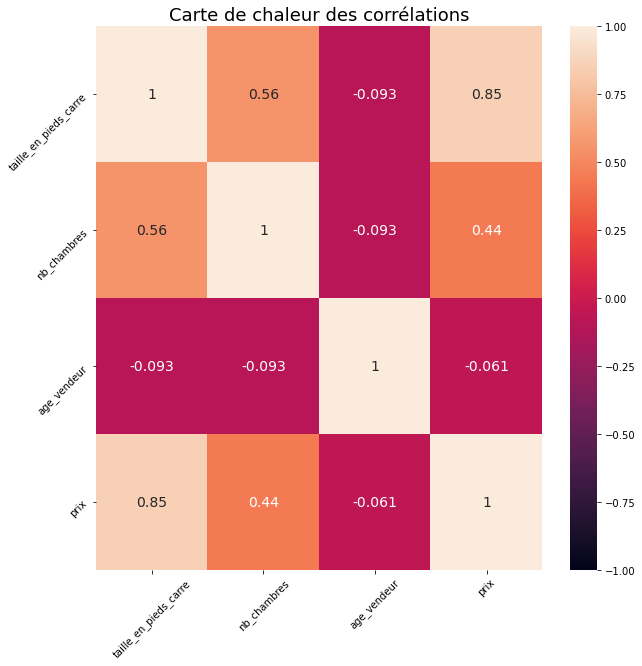

In [4]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(
    logements_df.corr(), # Valeur à gérer, ici notre tableau de covariance 
    vmin=-1, 
    vmax=1, 
    annot=True, 
    annot_kws={"fontsize":14}
)
plt.yticks(rotation=45) 
plt.xticks(rotation=45)
plt.title("Carte de chaleur des corrélations", fontdict={'fontsize':18})

#### Règle de base pour les valeurs de corrélation
- -/+ 1–0.8 → Très fortement corrélé
- -/+ 0.799–0.6 → Fortement corrélé
- -/+ 0.599–0.4 → Modéremment corrélé
- -/+ 0.399–0.2 → Faiblement corrélé
- -/+ 0.199–0 → Très faiblement corré

##### Que constatez-vous ?

Grâce à nos covariances, nous savons maintenant quelles features nous allons utiliser pour trouver le prix. 
Cette phase de découverte des covariances est très utile, surtout quand le dataset possède beaucoup de features, le calcul des covariances nous permet de savoir quelles features influencent réellement notre valeur de sortie. Ainsi le but de notre TP est de trouver l'équation suivante :

$$ prix = a_1(taille\_en\_pieds\_carre) + a_2(nb\_chambres) + b $$
scikit-learn va nous aider à trouver les valeurs de $a_1-_2$ et $b$. 

Prochain graphique : disposition des données. Dans le TP de régression linéaire nous avons utilisé le nuage de points, toutefois vu que nous avons plus de deux colonnes, le nuage de points ne peut pas fonctionner, nous allons donc utiliser un nuage de points 3D.

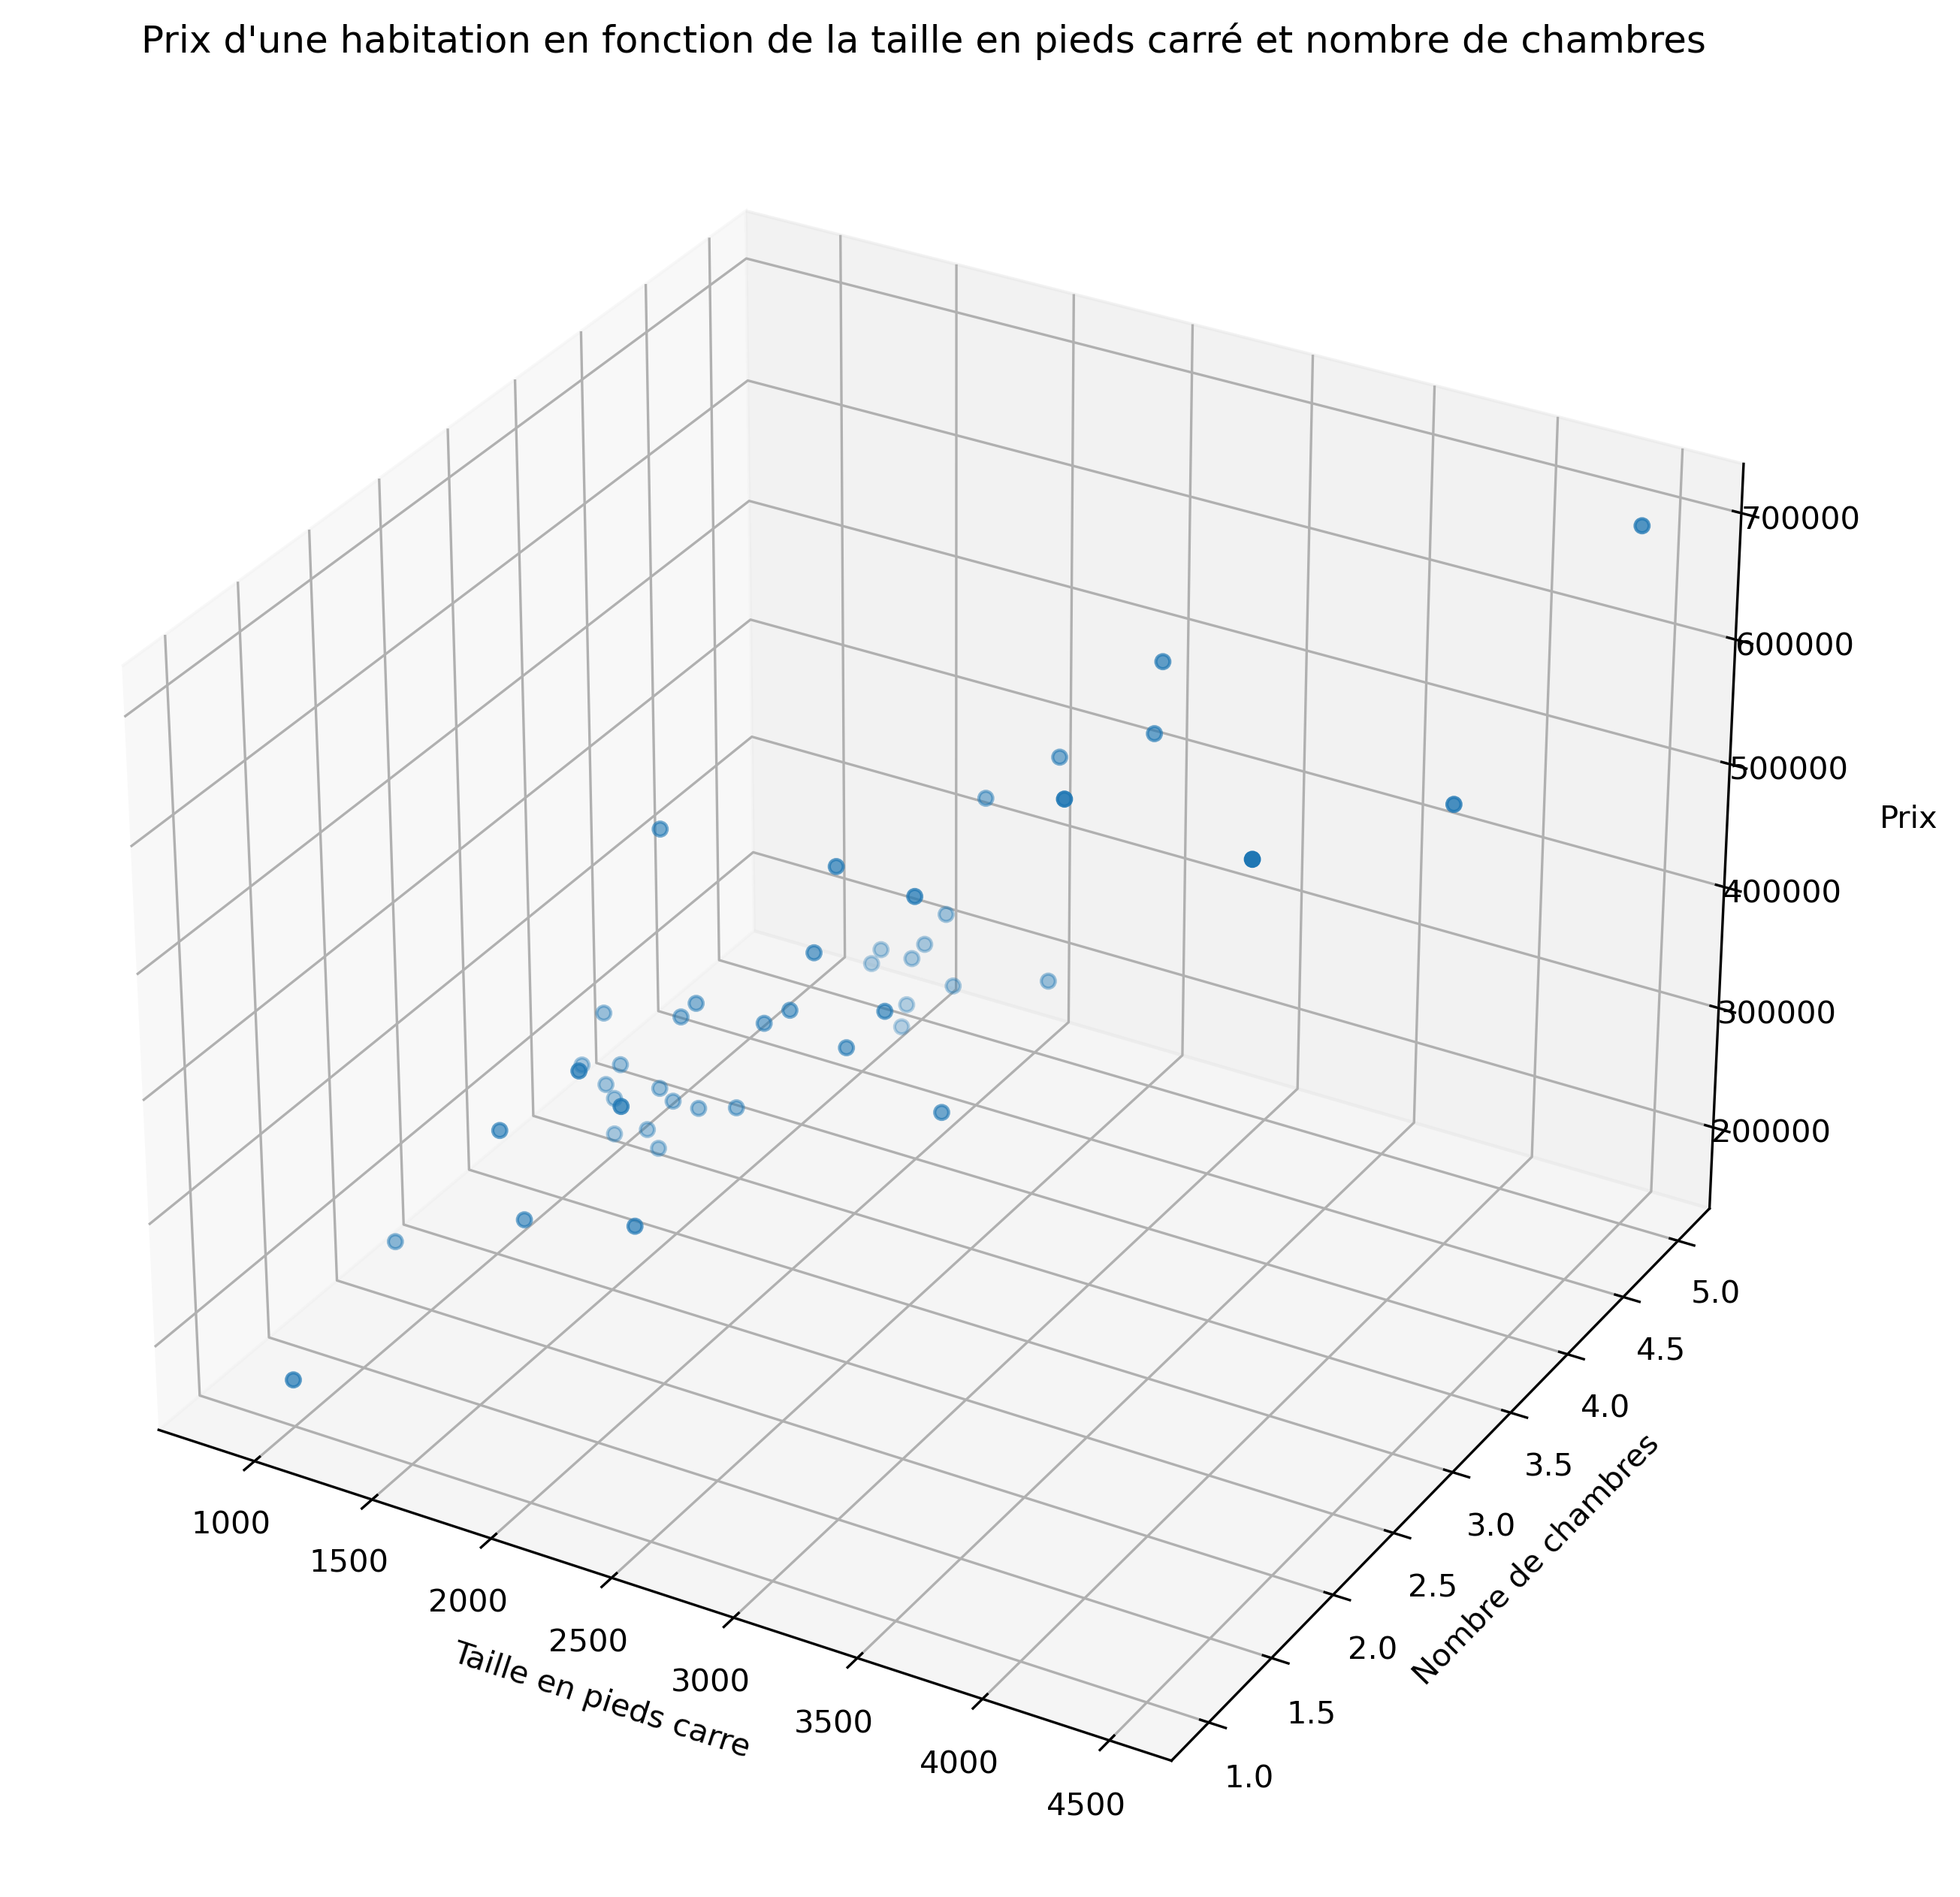

In [5]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 8), dpi=300)
ax = Axes3D(fig)

plt.title('Prix d\'une habitation en fonction de la taille en pieds carré et nombre de chambres')

ax.set_xlabel('Taille en pieds carre')
ax.set_ylabel('Nombre de chambres')
ax.set_zlabel('Prix', labelpad=15)

ax.scatter(
    logements_df["taille_en_pieds_carre"], # x
    logements_df["nb_chambres"], # y  
    logements_df["prix"], # z
    marker='o', 
)

# Phase 3 : Nettoyage / Formattage

Comme pour le TP précédent, nous allons calculter l'IQR (Interquatile Range / Ecart Interquartile) pour éliminer les valeurs aberrantes.

- Calculez l'IQR pour chaque colonne
- Supprimez les valeurs aberrantes basses et hautes pour chaque feature

# A vous de coder

Calcul de l'IQR
```python
Q1 = df['nom_de_colonne'].quantile(0.25) # Premier quartile
Q3 = df['nom_de_colonne'].quantile(0.75) # Troisième quartile
IQR = Q3 - Q1 # On calcule IQR
```

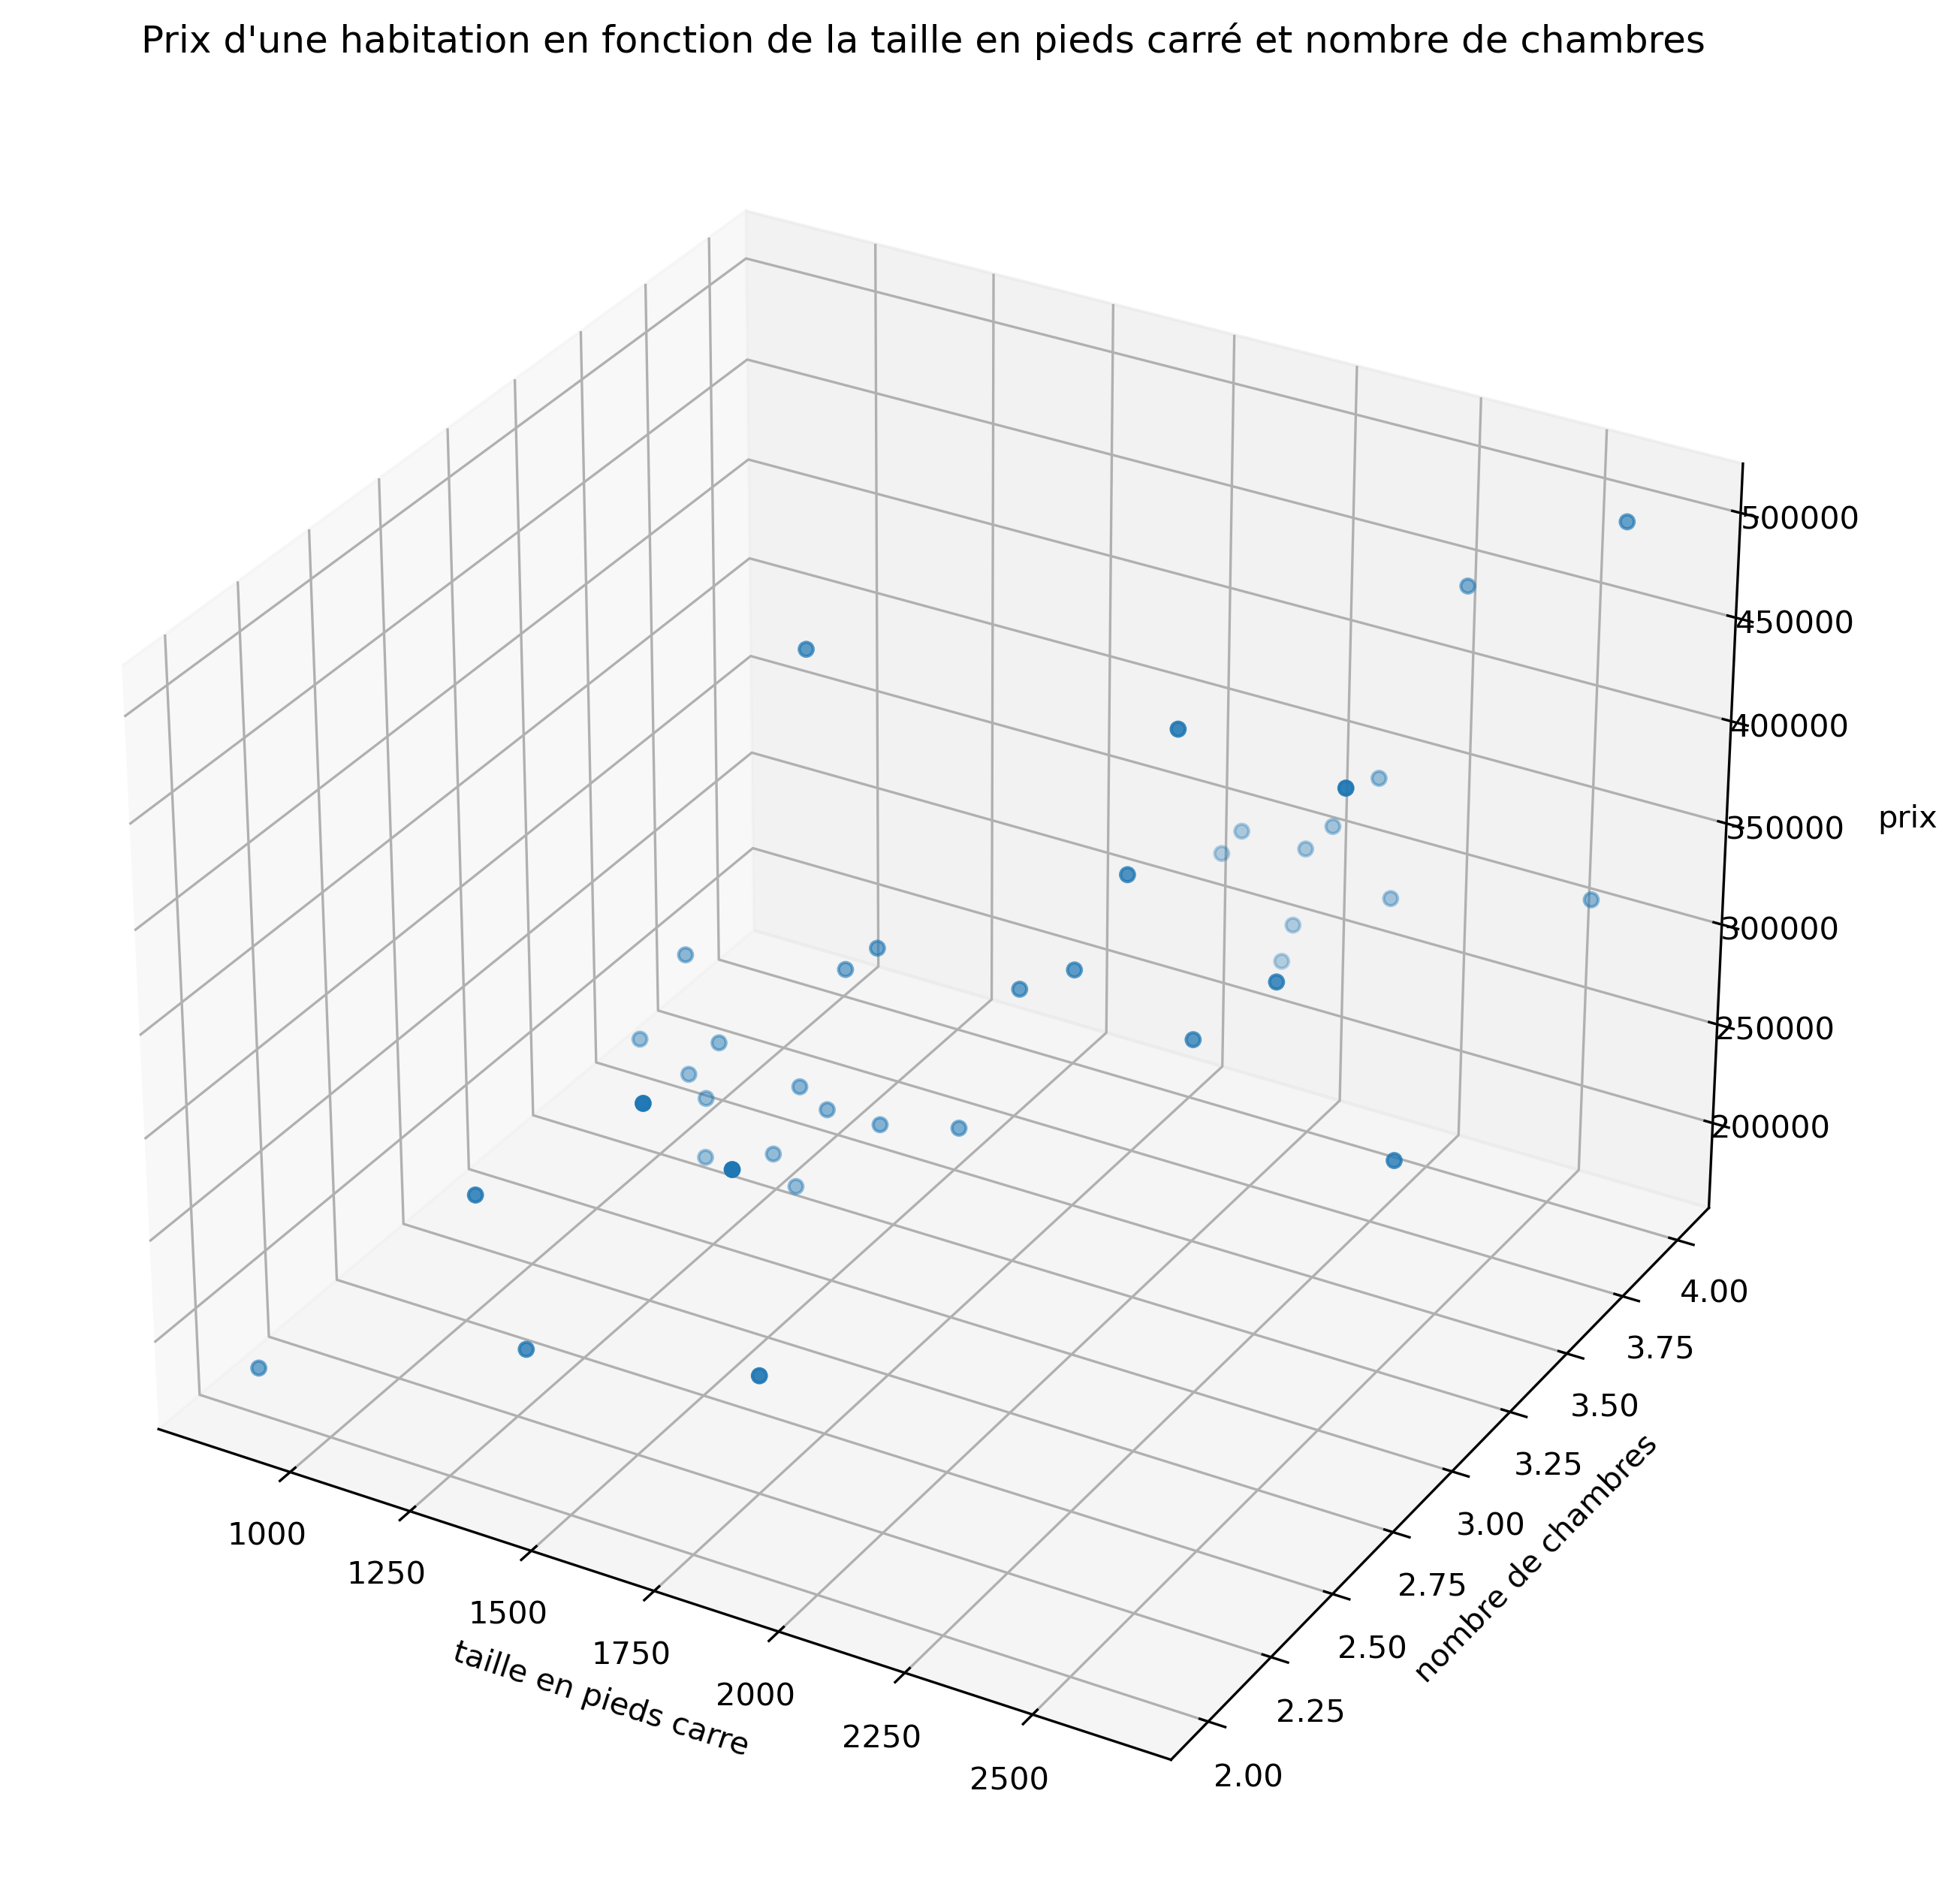

In [6]:
# Calculez l'IQR pour chaque colonne
# Supprimez les valeurs aberrantes basses et hautes pour chaque feature (voir le précédent TP pour plus d'informations)
# Travaillez avec la variable tmp_logements_df

liste_colonnes = ['taille_en_pieds_carre', 'nb_chambres', "prix"]

tmp_logements_df = logements_df.copy()
coeff = 1.5

logements_df = tmp_logements_df

# Et on réaffiche notre graphique
fig = plt.figure(figsize=(15, 8), dpi=300)
ax = Axes3D(fig)

plt.title('Prix d\'une habitation en fonction de la taille en pieds carré et nombre de chambres')

ax.set_xlabel('taille en pieds carre')
ax.set_ylabel('nombre de chambres')
ax.set_zlabel('prix', labelpad=15)

ax.scatter(
    logements_df["taille_en_pieds_carre"], # x
    logements_df["nb_chambres"], # y  
    logements_df["prix"], # z
    marker='o', 
)

Notez que lorsqu'il y a plus de colonnes, il faudra utiliser un type spécial de graphiques : le pairplot.

# Phase 4 : Modélisation

Nous allons utiliser scikit-learn et la régression linéaire via la ligne de code suivante `from sklearn.linear_model import LinearRegression, HuberRegressor`.
Nous allons donc tester deux modèles en même temps, et nous allons également utiliser la fonction `train_test_split` pour valider notre modèle et comparer avec les prédictions. Mais avant on va mettre toutes nos features sur le même ordre de grandeurs. Vous avez remarqué que le le nombre de chambre oscille entre 2 et 6, là où la taille d'une maison, elle, oscille sur de bien plus grande valeur. La régression linéaire multiple est très sensible à ceci, alors pour éviter tout problème nous allons mettre toutes les données dans le même ordre de grandeur grâce au "features scaling".

### Features scaling

Comme son nom l'indique cette étape ne concerne que les features (les données d'entrées de notre modèle), ces dernières vont voir leur ordre de grandeur être mis au même niveau pour ainsi limiter tout problème lors de l'application de nos modèles. Pour ce faire nous allons utiliser la classe `StandardScaler` contenue dans `sklearn.preprocessing`. Une fois instanciée, la classe `StandardScaler` nous permet d'accéder à la fonction `.fit_transform()` qui va normaliser nos données.

- [Plus d'informations sur le features scaling (anglais)](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)
- [Plus d'informations sur le features scaling](https://mrmint.fr/multivariate-regression)

In [47]:
from sklearn.preprocessing import StandardScaler

# On cherche à calculer le prix donc on ne garde que ces features, 
# la colonne "age_vendeur" n'ayant aucune influence dessus
liste_feat = logements_df[['taille_en_pieds_carre', 'nb_chambres']]
# Notre sortie, c'est le prix, c'est la valeur que l'on souhaite prédire
sortie = logements_df['prix']

# On instancie la classe StandardScaler
scale = StandardScaler()

# On met sur le même ordre de grandeur toutes les données
X_scaled = scale.fit_transform(liste_feat)

# Affichez X_scaled pour voir ce que la fonction a fait.

##### Qu'observons-nous ?

In [48]:
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.model_selection import train_test_split

ratio_donnees_test = 0.2
X_entrainement, X_test, y_entrainement, y_test = train_test_split(
    # On met donc nos features "scalées" dans la fonction train_test_split pour ensuite faire comme d'habitude
    X_scaled, 
    sortie,
    test_size=ratio_donnees_test
)

# LinearRegression
L'utilisation est identique à ce que nous avons fait lors du TP sur la régression linéaire simple

In [49]:
lin_reg = LinearRegression()
lin_reg.fit(X_entrainement, y_entrainement)

# astype(int) permet de transformer en entiers les résultats
Y_lin_pred = lin_reg.predict(X_test).astype(int)

display(f"Les coefficients directeurs sont {lin_reg.coef_}")
display(f"L'ordonnée à l'origine est {lin_reg.intercept_}")

# On stocke le score de notre modèle pour comparer sa performance face à un autre modèle
lin_reg_score = round(lin_reg.score(X_test, y_test) * 100, 2)
display(f"Score de notre modèle: {lin_reg_score}%")

# Contient les prédictions pour nous permettre de comparer les différents modèles
liste_predictions = pd.DataFrame({
    'Prix cible': y_test, 
    'Prix est. (linéaire)': Y_lin_pred
})
display(liste_predictions)

'Les coefficients directeurs sont [ 67828.07120759 -29939.76799513]'

"L'ordonnée à l'origine est 303282.28885558905"

'Score de notre modèle: -9.96%'

,Prix cible,Prix est. (linéaire)
7,198999,255869
21,255000,371824
18,499998,386403
29,299900,437398
8,212000,248818
15,449900,340046
43,299000,221813
26,464500,260520


0.11773296247959422

##### Que constatez-vous ?

# HuberRegressor

### A vous de coder : Utilisez la régression hubérienne
- Entraînez votre modèle
- Prédisez les valeurs de X_test
- Affichez les coefficients directeurs et l'ordonnée à l'origine
- Affichez le score
- Affichez les résultats dans le DataFrame "liste_predictions"

- [Documentation de HuberRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html#sklearn.linear_model.HuberRegressor)

In [50]:
# HuberRegressor a été importé plus haut
reg_huber = HuberRegressor()

'Le coefficient directeur sont [ 50267.56328769 -20170.41986249]'

"L'ordonnée à l'origine est 299305.3522106882"

'Score de notre modèle: 61.87%'

,Prix cible,Prix est. (linéaire),Prix est. (huber)
7,198999,255869,263773
21,255000,371824,346553
18,499998,386403,363666
29,299900,437398,398304
8,212000,248818,258547
15,449900,340046,329311
43,299000,221813,238534
26,464500,260520,267219


7     -64774
21    -91553
18    136332
29    -98404
8     -46547
15    120589
43     60466
26    197281
Name: prix, dtype: int64

##### Que constatez-vous ?

HuberRegressor, LinearRegression ne semblent fonctionner, leurs scores de prédictions sont trop faibles. Alors essayons-nous à la forêt d'arbres décisionnels, mais cette fois-ci dans sa version régression.

# RandomForestRegressor

### A vous de coder : Utilisez la forêt d'arbres de régression
- Entraînez votre modèle
- Prédisez les valeurs pour X_test
- Affichez les coefficients directeurs et l'ordonnée à l'origine
- Affichez le score
- Affichez les résultats dans le DataFrame "liste_predictions"


- [Documentation de HuberRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html#sklearn.linear_model.RandomForestRegressor)

In [51]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()

'Score de notre modèle: -13.53%'

,Prix cible,Prix est. (linéaire),Prix est. (huber),Prix est. (foret regr)
7,198999,255869,263773,246133
21,255000,371824,346553,341814
18,499998,386403,363666,349079
29,299900,437398,398304,412884
8,212000,248818,258547,243089
15,449900,340046,329311,325796
43,299000,221813,238534,231940
26,464500,260520,267219,247525


0.11824429657061117

##### Que constatez-vous ?

## Score

On a vu précédemment que le score nous permettait d'évaluer la performance d'un modèle (le but étant de s'approcher de 1) toutefois, dépendamment du problème qu'on essaye de résoudre, le score doit être évalué une seconde fois. Dans notre cas, estimation du prix d'une propriété, un écart de 1 000-10 000 n'est pas vraiment critique mais la méthode `score()`, elle n'est pas consciente de ça.
Par ailleurs la méthode retourne ce qu'on appelle le R² appelé aussi "coefficient de détermination", qui représente la mesure de la qualité de prédiction d’une régression linéaire (simple ou multiple).

Nos R² étant sensiblement mauvais, deux solutions s'offrent à nous :
- Changer d'équation
- Changer notre façon de calculer notre score

Nous allons adopter la seconde option. Pour se faire, nous allons commencer par calculter les résidues, autrement dit la différence entre le résultat attendu (y_test) et le résultat prédit. S'il est négatif, on a sur-estimé, s'il est positif, on a sous-estimé, s'il est nulle la prédiction est bonne (mais ça c'est très rare).
$$ residu = y\_cible - y\_predit $$

display(residual)

In [58]:
liste_predictions_residus = liste_predictions.copy()
# Calcul des résidus pour la forêt d'arbres de régression 

,Prix cible,Prix est. (linéaire),residus. (linéaire),Prix est. (huber),residus. (huber),Prix est. (foret regr),residus. (regr)
7,198999,255869,-56870,263773,-64774,246133,-47134
21,255000,371824,-116824,346553,-91553,341814,-86814
18,499998,386403,113595,363666,136332,349079,150919
29,299900,437398,-137498,398304,-98404,412884,-112984
8,212000,248818,-36818,258547,-46547,243089,-31089
15,449900,340046,109854,329311,120589,325796,124104
43,299000,221813,77187,238534,60466,231940,67060
26,464500,260520,203980,267219,197281,247525,216975


C'est bien tout ça, mais ça ne nous apporte pas grand chose, alors nous allons utiliser des graphiques pour rendre le tout plus lisible et il existe un graphique pour : le residual plot (ou residplot dans seaborn). 
Nous mettrons les prédictions sur l'axe X et la valeur attendue sur l'axe Y. Il est bon de noter également que residplot ne fonctionne qu'avec des jeux de données avec de deux colonnes, dans notre cas, nous devont faire la régression avant.

Maintenant essayons-le !

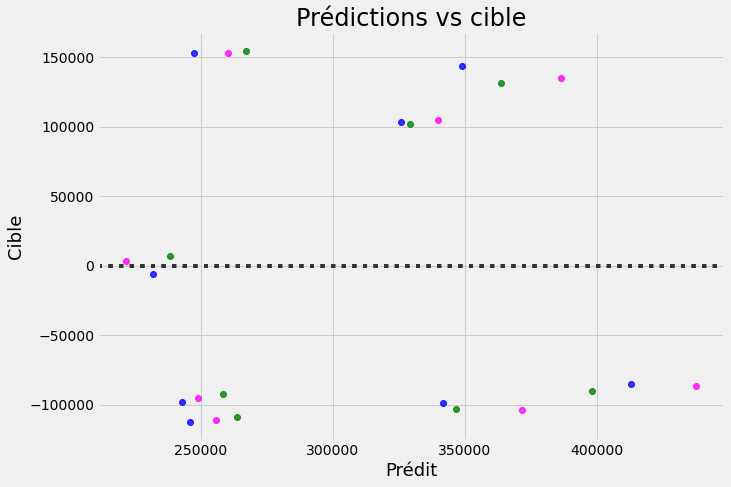

In [80]:
fig = plt.figure(figsize = (10, 7))
sns.residplot(
    x = liste_predictions_residus["Prix est. (linéaire)"], 
    y = liste_predictions_residus["Prix cible"],
    color='magenta'
)

# A compléter avec les autres résidus

plt.title('Prédictions vs cible', size=24)
plt.xlabel('Prédiction', size=18)
plt.ylabel('Cible', size=18);

Un "residual plot" se lit de la façon suivante : Plus notre point est proche du zéro plus notre prédiction est proche de la réalité, on remarque ici que nos points sont très éloignés de la ligne du 0 (ligne pointillée), ceci signifie que notre modèle ($ y = a_1x_1 + a_2x_2 + … + a_nx_n + b $) n'est pas le plus adapté pour notre besoin. Que faire ? Changer de modèle.

Toutefois dans notre cas, nos très faibles performances sont tout simplement liées au faible nombre de données. C'est pourquoi il est important d'avoir des datasets de tailles assez conséquente.